In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [10]:
datagen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             validation_split=0.3,
                             vertical_flip=True,
                             rotation_range=30)

test_it = datagen.flow_from_directory('test/.',
                                       class_mode='categorical',
                                       target_size=(224, 224),
                                       batch_size=2,
                                       seed=7)
# confirm the iterator works
batchX, batchy = next(test_it)
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Found 5000 images belonging to 2 classes.
Batch shape=(2, 224, 224, 3), min=0.029, max=1.000


# lOADING PRE TRAINED MODEL

In [7]:
from tensorflow.keras.models import load_model
model = load_model('Cats&Dogs_final.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
Our model says it is a: Dog


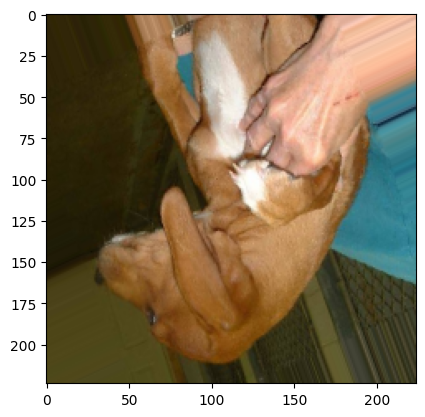

In [ ]:
# predicting random image

import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import PIL
img_batch = next(test_it)
img = random.randint(0,1000)
img_resized = img_to_array(img_batch[0][0])
img_resized = np.expand_dims(img_resized, axis=0)
y_pred = model.predict(img_resized)
plt.imshow(img_resized[0])
pred='all'
if y_pred[0][0] > 0.5 :
    pred='Cat'
else:
    pred='Dog'
print('Our model says it is a:', pred)